In [1]:
import matplotlib.pyplot as plt
from metamod.utils import maml_routine
import torch
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
from tqdm import tqdm
import pickle
import os

In [2]:
iter_control = 200
eval_steps = 200
n_steps = np.arange(2, 21, 2)
results_path = "../../results/maml_sweep"

In [3]:
def integrate_loss(loss, time_span):
    dt = time_span[1] - time_span[0]
    return np.sum(loss)*dt

In [4]:
cumulated_test_loss = []
cumulated_train_loss = []

In [5]:
for steps in tqdm(n_steps):
    results = maml_routine(n_steps=steps,
                           eval_steps=eval_steps,
                           iter_control=iter_control)
    run_name = "n_steps_" + str(steps) + ".pkl"
    save_path = os.path.join(results_path, run_name)
    pickle.dump(results, open(save_path, "wb"), protocol=pickle.HIGHEST_PROTOCOL)
    cumulated_test_loss.append(integrate_loss(results["Loss_t_control_opt_test"], results["eval_time_span"]))
    cumulated_train_loss.append(integrate_loss(results["Loss_t_control_opt"], results["eval_time_span"]))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [03:40<00:00, 22.06s/it]


In [6]:
results.keys()

dict_keys(['iters', 'Loss_t_sim', 'weights_sim', 'weights_iters_sim', 'Loss_t_sim_test', 'avg_Loss_t_sim', 'avg_Loss_t_sim_test', 'time_span', 'eval_time_span', 'W1_t_eq', 'W2_t_eq', 'Loss_t_eq', 'Loss_t_eq_test', 'W1_t_control_init', 'W2_t_control_init', 'Loss_t_control_init', 'Loss_t_control_init_test', 'control_signal_init', 'cumulated_reward_opt', 'W1_grad', 'W2_grad', 'W1_t_control_opt', 'W2_t_control_opt', 'Loss_t_control_opt', 'Loss_t_control_opt_test'])

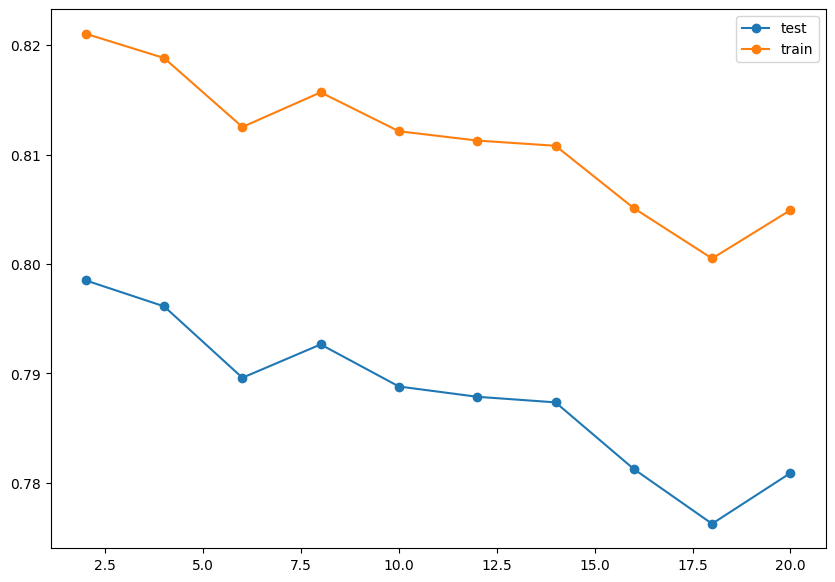

In [8]:
f, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.plot(n_steps, cumulated_test_loss, "-o", label="test")
ax.plot(n_steps, cumulated_train_loss, "-o", label="train")
ax.legend()
plt.show()